## 5章: RDKitで構造情報を取り扱う

この章ではRDKitを使って分子の読み込みの基本を覚す。えま

### SMILESとは
Simplified molecular input line entry system (SMILES) とは化学構造を文字列で表現するための表記方法です。詳しくは <a href="https://www.daylight.com/meetings/summerschool98/course/dave/smiles-intro.html#TOC"  target="_blank"> SMILES Tutorial </a>で説明されていますが、例えば c1ccccc1 は 6 つの芳香族炭素が最初と最後をつないでループになっている構造、つまりベンゼンを表現していることになります。

### 構造を描画してみよう
SMILESで分子を表現することがわかったので、SMILES を読み込んで分子を描画させてみましょう。まずは RDKit のライブラリから Chem クラスを読み込みます。（二行目は Jupyter Notebook 上で構造をするための描画設定です。2023/10/09 時点では不要？）

In [1]:
from rdkit import Chem
# from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

RDKitにはSMILES文字列を読み込むために MolFromSmiles というメソッドが用意されていますので、これを使い分子を読み込みます。

In [2]:
mol = Chem.MolFromSmiles("c1ccccc1")

続いて構造を描画しますが、単純に mol を評価するだけで構造が表示されます。

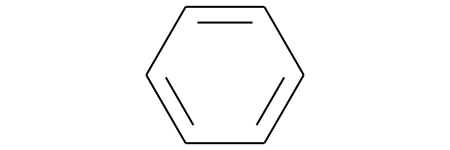

In [3]:
mol

原子を線でつなぎ構造を表現する方法（構造式）と、SMILES 表記はどちらも同じものを表現しています。構造式は人が見てわかりやすいですが、SMILES は ASCII 文字列で表現されるのでより少ないデータ量で表現できるというメリットがあります。

#### Note
文字列で表現できるということは、文字列生成アルゴリズムを応用することで新規な化学構造を生成することも可能ということです。この内容に関しては 12 章で詳しく説明します。

### 複数の化合物を一度に取り扱うには？
複数の化合物を一つのファイルに格納する方法にはいくつかありますが、sd というファイル形式を利用するのが一般的です。SD ファイルということで、ファイルの拡張子は .sdf となることが多いです。

#### sdf とは？
MDL 社で開発された分子表現のためのフォーマットに<a href="https://en.wikipedia.org/wiki/Chemical_table_file" target="_blank"> MOL 形式</a>というものがあります。この MOL 形式を拡張したものが SD ファイルです。具体的には MOL 形式で表現されたものを ＄＄＄＄ という行で区切ることにより、複数の分子を取り扱えるようにしてあります。

MOL 形式は分子の三次元座標を格納することができ二次元だけでなく立体構造を表現できる点は SMILES との大きな違いです。

#### SD ファイルを ChEMBL からダウンロードする
4章を参考に<a href="https://www.ebi.ac.uk/chembl/g/#search_results/all/query=CHEMBL669726%0A" target="_blank"> ChEMBL </a> のトポイソメラーゼ II 阻害試験(CHEMBL669726)の構造データを sdf ファイル形式でダウンロードします。

#### NOTE
具体的な手順はリンクのページを開いて、検索フォームに CHEMBL669726 を入力すると検索結果が表示されるので、Compounds タブをクリックします。その後、全選択して SDF でダウンロードすると gzip 圧縮された sdf がダウンロードされるので、gunzip コマンドまたは適当な解凍ソフトで解凍してください。それを ch05_compounds.sdf という名前で保存します。


### RDKit で sdf を取り扱う
RDKit で sdf ファイルを読み込むには SDMolSupplier というメソッドを利用します。複数の化合物を取り扱うことになるので mol ではなく mols という変数に格納していることに注意してください。どういう変数を使うかの決まりはありませんが、見てわかりやすい変数名をつけることで余計なミスを減らすことは心がけるとよいでしょう。

In [4]:
mols = Chem.SDMolSupplier("notebooks/ch05_compounds.sdf")

何件の分子が読み込まれたのか確認します。数を数えるには len を使います。34 件が見られると思います。

In [5]:
len(mols)

34

### 分子の構造を描画する
for ループを使って、ひとつずつ分子を描画してもいいですが、RDKit には複数の分子を一度に並べて描画するメソッドが用意されているので、今回はそちらの MolsToGridImage メソッドを使います。なお一行に並べる分子の数を変更するには molsPerRow オプションで指定します。

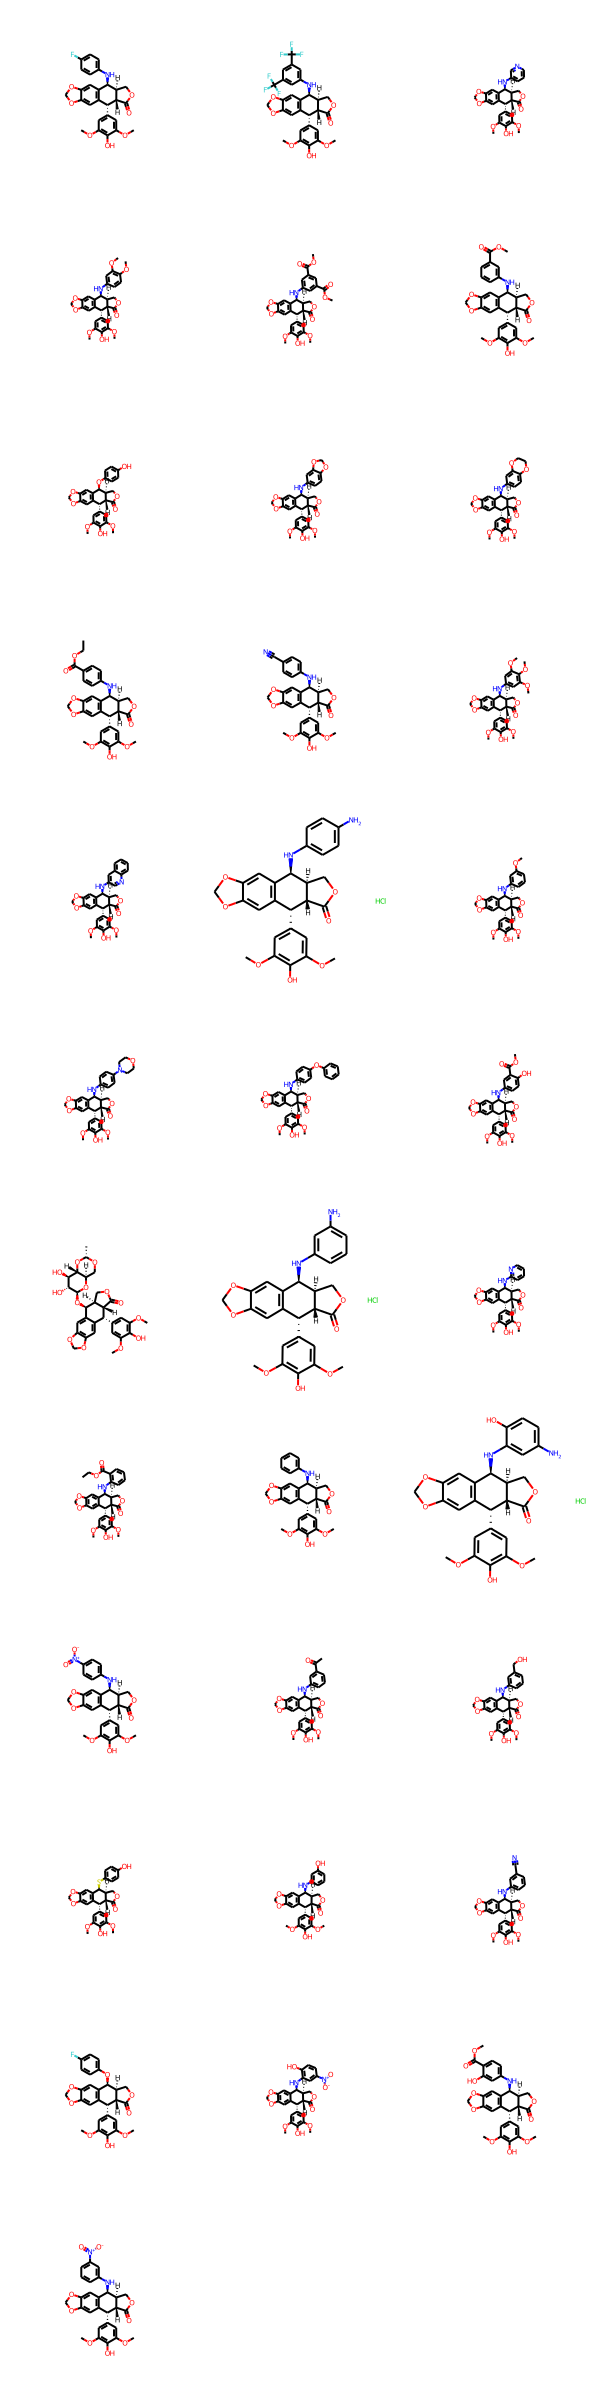

In [6]:
Draw.MolsToGridImage(mols)

#### (おまけ)
参考までにループを回すやりかたも載せておきます。

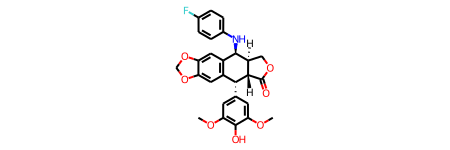

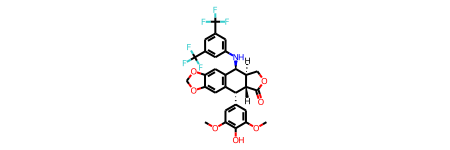

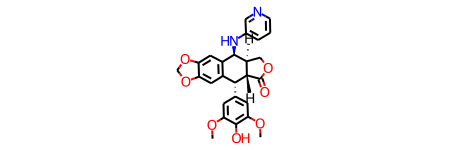

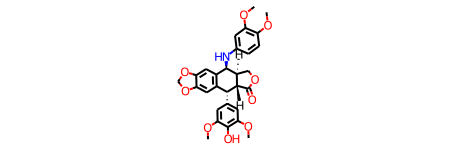

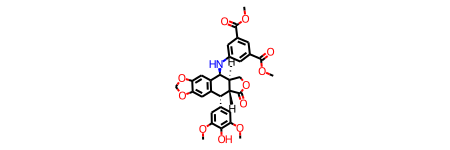

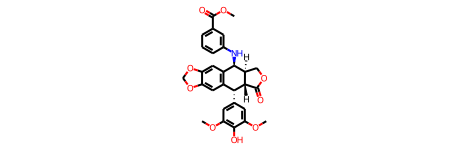

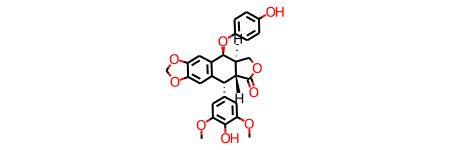

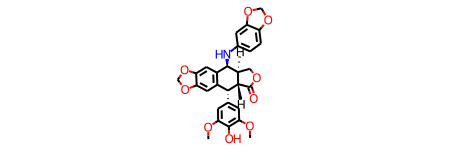

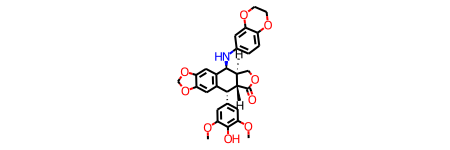

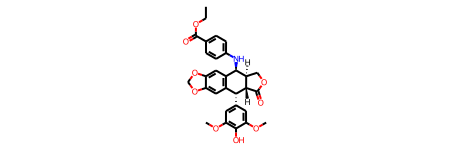

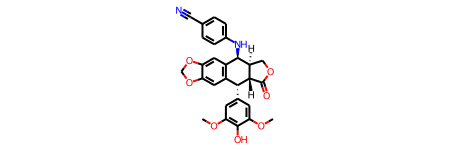

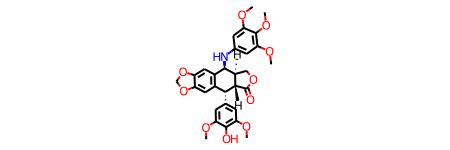

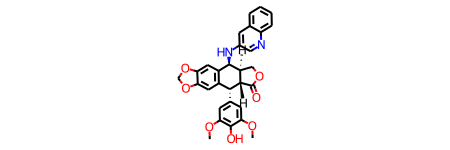

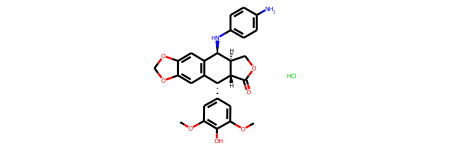

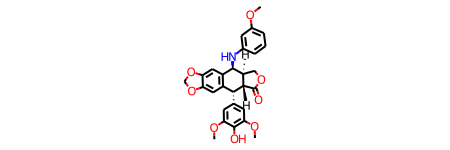

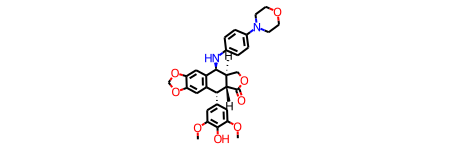

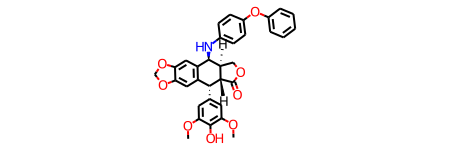

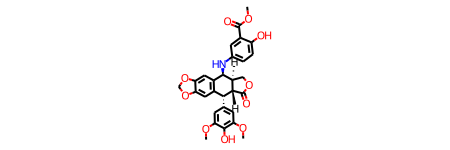

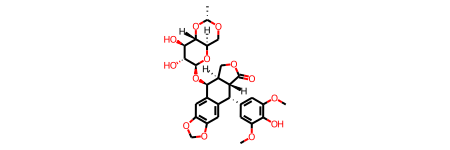

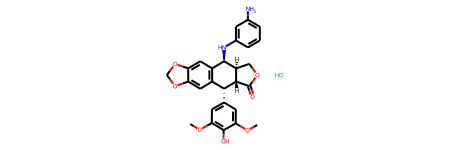

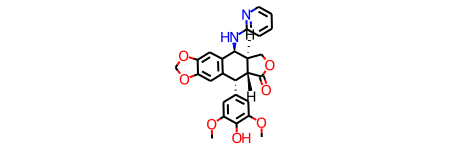

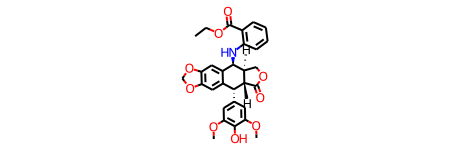

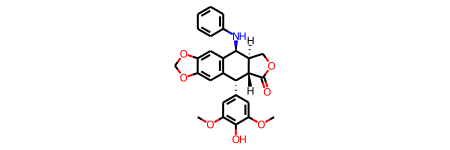

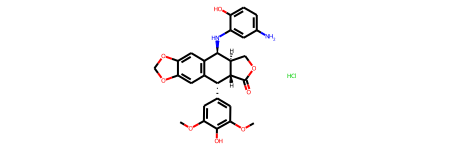

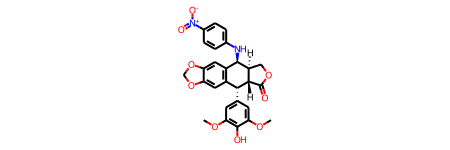

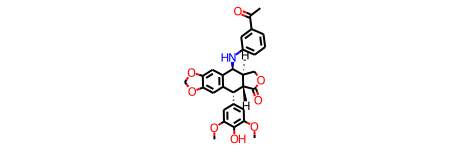

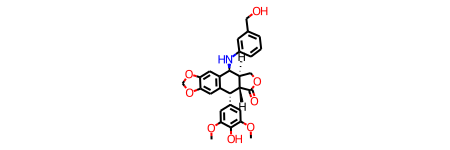

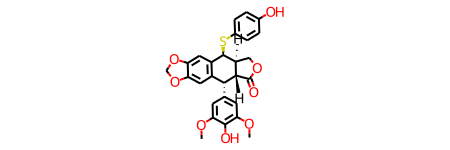

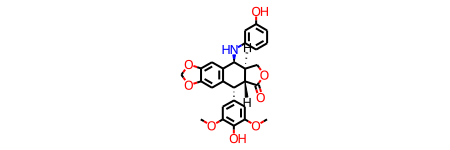

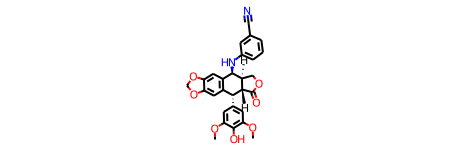

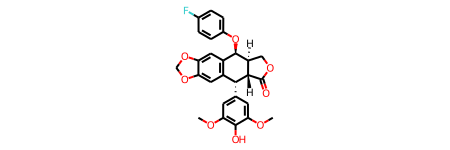

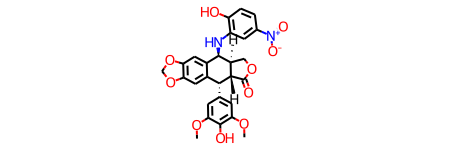

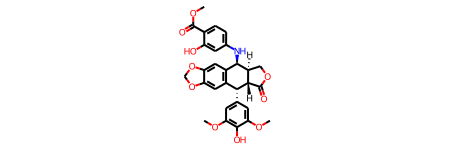

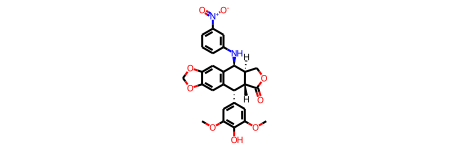

In [7]:
for mol in mols:
    display(mol)

### ヘテロシャッフリングをしてみる
創薬の化合物最適化ブロジェクトで、分子の形を変更しないで化合物の特性を変えたいということがあります。このような場合、芳香環を形成する炭素、窒素、硫黄、酸素などの原子種を入れ替えることでより良い特性の化合物が得られることがありますがこのようにヘテロ原子(水素以外の原子)を入れ替えるアプローチをヘテロシャッフリングといいます。

ヘテロシャッフリングを行うことで、活性を維持したまま物性を変化させて動態を良くする、活性そのものを向上させる、特許クレームの回避といった効果が期待できます。

少しの構造の違いが選択性や薬物動態が影響を与える有名な例として、Pfizer 社の<a href="https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL192/" target="_blank"> Sildenafil (Viagra) </a>と GSK 社の<a href="https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL1520/" target="_blank"> Vardinafil </a>が挙げられます。

二つの構造を比較すると中心の環構造部分の窒素原子の並びが異なっているだけで極めて似ています。両分子は同じ標的蛋白質を阻害しますが、<a href="https://www.nature.com/articles/3901525" target="_blank">活性や薬物動態</a>は異なります。

画像を生成するコードを示します。単に Draw.MolsToGridImage を適用するのではなく Core 構造をベースにアライメントしていることと Draw.MolToGridImage のオプションに legends を与え、分子名を表示していることに注意してください。

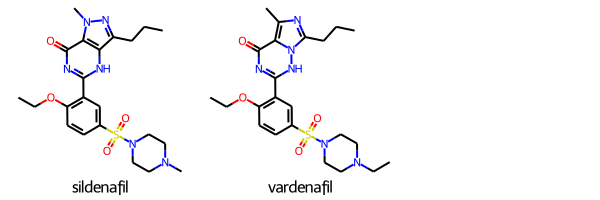

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdFMCS
from rdkit.Chem import TemplateAlign
# IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

sildenafil = Chem.MolFromSmiles('CCCC1=NN(C)C2=C1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(=O)(=O)N1CCN(C)CC1')
vardenafil = Chem.MolFromSmiles('CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(=O)(=O)N1CCN(CC)CC1')
rdDepictor.Compute2DCoords(sildenafil)
rdDepictor.Compute2DCoords(vardenafil)
res = rdFMCS.FindMCS([sildenafil, vardenafil], completeRingsOnly=True, atomCompare=rdFMCS.AtomCompare.CompareAny)
MCS = Chem.MolFromSmarts(res.smartsString)
rdDepictor.Compute2DCoords(MCS)

TemplateAlign.AlignMolToTemplate2D(sildenafil, MCS)
TemplateAlign.AlignMolToTemplate2D(vardenafil, MCS)
Draw.MolsToGridImage([sildenafil, vardenafil], legends=['sildenafil', 'vardenafil'])

ヘテロシャッフルした分子を生成するために HeteroShuffle というクラスを定義します。オブジェクトの生成にはシャッフルしたい分子と変換したい部分構造（Core）を与えます。クラス内のコードではまず、分子を Core で切断し、Core とそれ以外に分けます。Core の Aromatic 原子で、置換基がついてない原子のみが置換候補になります。シャッフル後の Core と Core 以外のパーツを再結合するための反応オブジェクトを生成するメソッドが make_connector です。このメソッドで作られた反応オブジェクトを利用して re_construct_mol で分子を再構築しています。

考えられる原子の組み合わせを構築するために、itertools.product に、候補原子（C, S, N, O）の原子番号と、環を構成する原子数 target_atomic_nums を与えます。その後に分子として生成できないものは排除するのでここでは考えられる全部の組み合わせを出します。

In [9]:
import copy
import itertools

from rdkit import Chem
from rdkit.Chem import AllChem


class HeteroShuffle():

    def __init__(self, mol, query):
        self.mol = mol
        self.query = query
        self.subs = Chem.ReplaceCore(self.mol, self.query)
        self.core = Chem.ReplaceSidechains(self.mol, self.query)
        self.target_atomic_nums = [6, 7, 8, 16]

    def make_connectors(self):
        n = len(Chem.MolToSmiles(self.subs).split('.'))
        map_no = n+1
        self.rxn_dict = {}
        for i in range(n):
            self.rxn_dict[i+1] = AllChem.ReactionFromSmarts('[{0}*][*:{1}].[{0}*][*:{2}]>>[*:{1}][*:{2}]'.format(i+1, map_no, map_no+1))
        return self.rxn_dict

    def re_construct_mol(self, core):
        '''
        re construct mols from given substructures and core
        '''
        keys = self.rxn_dict.keys()
        ps = [[core]]
        for key in keys:
            ps = self.rxn_dict[key].RunReactants([ps[0][0], self.subs])
        mol = ps[0][0]
        try:
            smi = Chem.MolToSmiles(mol)
            mol = Chem.MolFromSmiles(smi)
            Chem.SanitizeMol(mol)
            return mol
        except:
            return None

    def get_target_atoms(self):
        '''
        get target atoms for replace
        target atoms means atoms which don't have anyatom(*) in neighbors
        '''
        atoms = []
        for atom in self.core.GetAromaticAtoms():
            neighbors = [a.GetSymbol() for a in atom.GetNeighbors()]
            if '*' not in neighbors and atom.GetSymbol() != '*':
                atoms.append(atom)
        print(len(atoms))
        return atoms

    def generate_mols(self):
        atoms = self.get_target_atoms()
        idxs = [atom.GetIdx() for atom in atoms]
        combinations = itertools.product(self.target_atomic_nums, repeat=len(idxs))
        smiles_set = set()
        self.make_connectors()
        for combination in combinations:
            target = copy.deepcopy(self.core)
            for i, idx in enumerate(idxs):
                target.GetAtomWithIdx(idx).SetAtomicNum(combination[i])
            smi = Chem.MolToSmiles(target)
            target = Chem.MolFromSmiles(smi)
            if target is not None:
                n_attachment = len([atom for atom in target.GetAtoms() if atom.GetAtomicNum() == 0])
                n_aromatic_atoms = len(list(target.GetAromaticAtoms()))
                if target.GetNumAtoms() - n_attachment == n_aromatic_atoms:
                    try:
                        mol = self.re_construct_mol(target)
                        if check_mol(mol):
                            smiles_set.add(Chem.MolToSmiles(mol))
                    except:
                        pass
        mols = [Chem.MolFromSmiles(smi) for smi in smiles_set]
        return mols

上のコードで使われている check_mol という関数は c1coooo1 のような６員環の構造も Aromatic だと判定されてしまうのでそれを避けるために使っています。O, S が許容されるのは５員環のヘテロ芳香環のみにしました。

In [10]:
def check_mol(mol):
    arom_atoms = mol.GetAromaticAtoms()
    symbols = [atom.GetSymbol() for atom in arom_atoms if not atom.IsInRingSize(5)]
    if not symbols:
        return True
    elif 'O' in symbols or 'S' in symbols:
        return False
    else:
        return True

実際に使ってみます。

Geftinib (Iressa ®), Oxaprozin (非ステロイド抗炎症薬-非選択的COX 1&2阻害剤)

In [11]:
# Gefitinib
mol1 = Chem.MolFromSmiles('COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4')
core1 = Chem.MolFromSmiles('c1ccc2c(c1)cncn2')
#  Oxaprozin
mol2 = Chem.MolFromSmiles('OC(=O)CCC1=NC(=C(O1)C1=CC=CC=C1)C1=CC=CC=C1')
core2 =  Chem.MolFromSmiles('c1cnco1')

元の分子

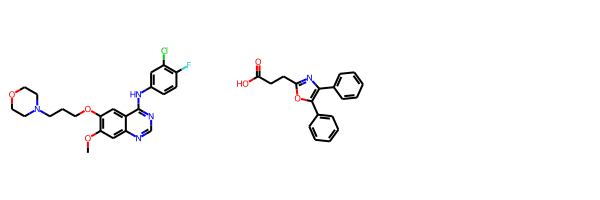

In [12]:
Draw.MolsToGridImage([mol1, mol2])

7


[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 7 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 8 9 10 11
[14:36:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 8 9 10 11
[14:36

32


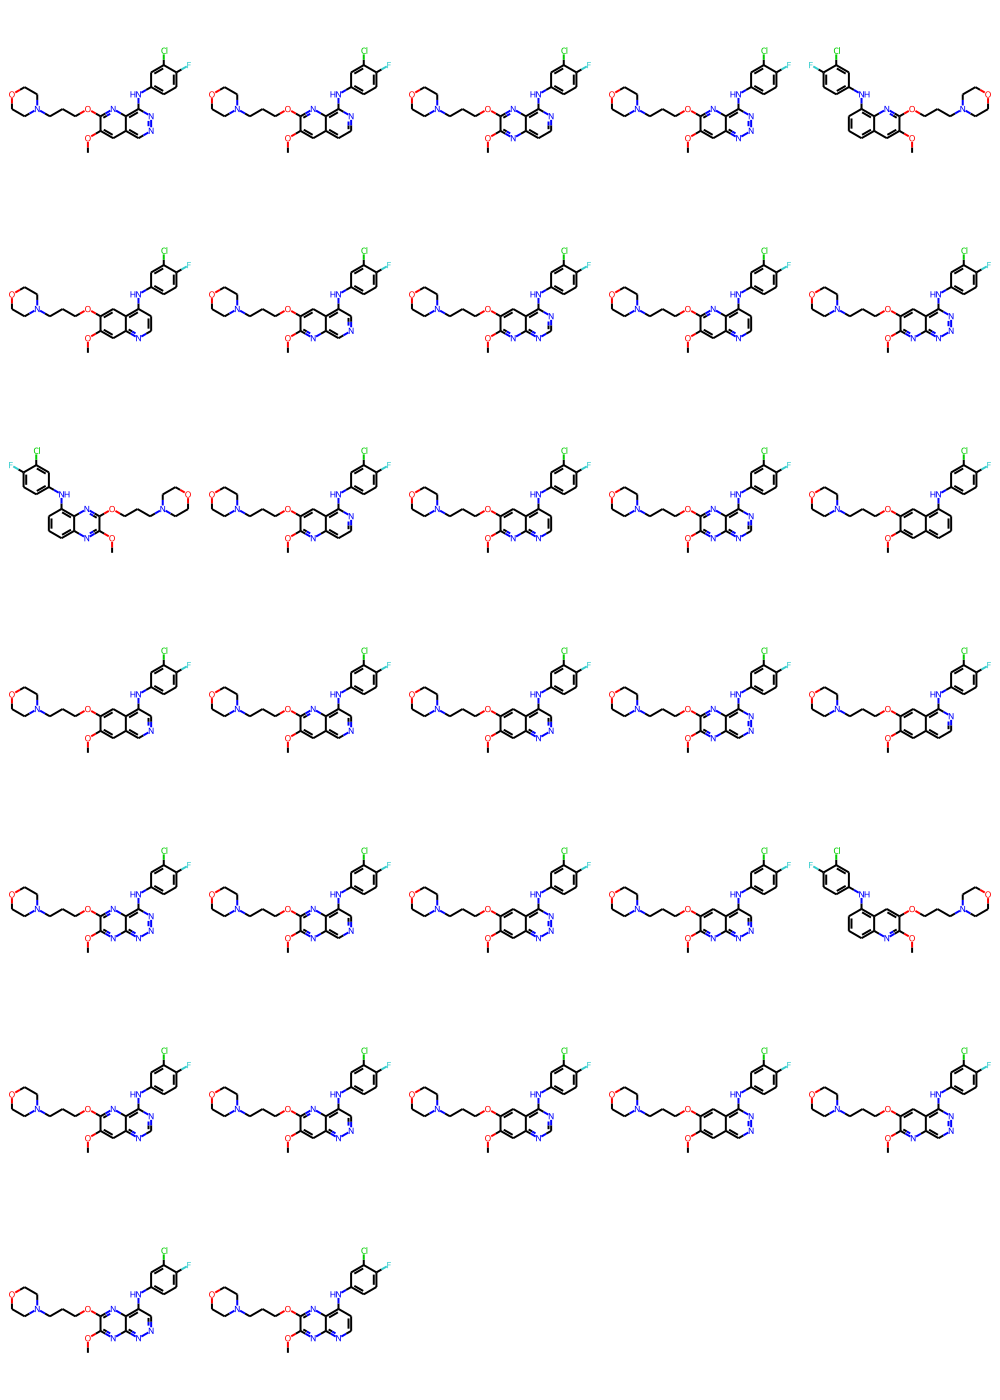

In [13]:
ht = HeteroShuffle(mol1, core1)
res = ht.generate_mols()
print(len(res))
Draw.MolsToGridImage(res, molsPerRow=5)

Gefitinib を入力とした場合の変換結果の一部です。芳香環を形成する原子が元の化合物から変化した分子が出力されています。 また、Core で指定したキナゾリン部分のみが変換されています。

2
4


[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 3 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 3 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 3 6
[14:36:38] Can't kekulize mol.  Unkekulized atoms: 1 3 6


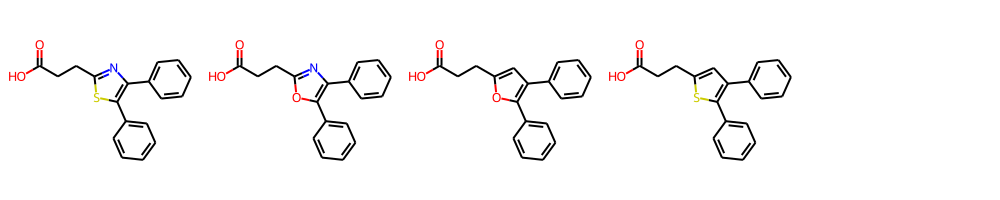

In [14]:
ht = HeteroShuffle(mol2, core2)
res = ht.generate_mols()
print(len(res))
Draw.MolsToGridImage(res, molsPerRow=5)

Oxaprozin を入力とした場合の変換結果です。こちらは中心に、<a href="https://en.wikipedia.org/wiki/Oxazole" target="_blank">オキサゾール</a>と呼ばれる 5 員環構造を有してます。5 員環を形成する芳香環にはチオフェン、フランなどのように窒素や酸素を含むものもあります。以下の例でも S、O が 5 員環の構成原子に含まれている分子が出力されています。

どうでしょうか。二つの分子の例を示しました。

一つ目の例、Gefitinib は、分子を構成する芳香環が、<a href="https://ja.wikipedia.org/wiki/%E3%82%AD%E3%83%8A%E3%82%BE%E3%83%AA%E3%83%B3" target="_blank">キナゾリン</a>とベンゼンでした。キナゾリンは、ベンゼンとピリミジンという二つの 6 員環が縮環した構造です。6 員環をベースに構成される芳香環を形成する原子の候補は炭素と窒素になります。（ピリリウムイオンなど電荷を持つものも考慮すれば酸素や硫黄も候補になりますが、通常このような構造を Drug Design で使うことは少ないので今回の説明からは外しています。<a href="https://ja.wikipedia.org/wiki/%E8%A4%87%E7%B4%A0%E7%92%B0%E5%BC%8F%E5%8C%96%E5%90%88%E7%89%A9" target="_blank">複素環式化合物の説明</a>）

Oxaprozin はオキサゾールを有しています。5 員環の芳香環を形成する原子の候補は炭素、窒素、硫黄、酸素が挙げられます。このような分子の場合の例として紹介しました。 いずれのケースでも上記のコードでヘテロ原子がシャッフルされたものが生成されています

### Tip
2018.03.1 以降の RDKit では EnumerateHeterocycles というメソッドが実装されているので上記のコードを書かずともヘテロシャッフルを容易に行うことができます。また、全部の芳香族原子を変換の対象にしたくないという場合があるかと思います。その時は、除外したい原子に _protected という属性持たせておくと良いです。実際の例をコードで見てみましょう。

384


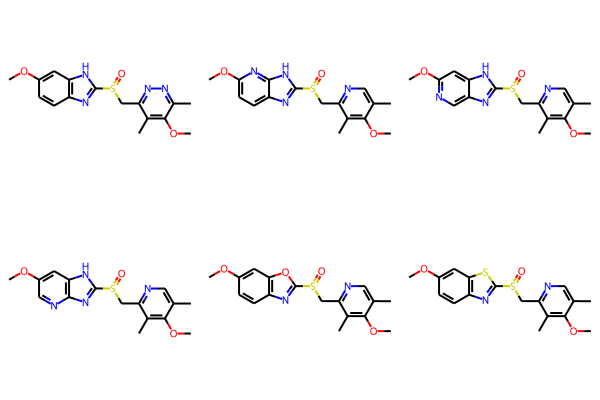

In [15]:
# EnumerateHeterocycles はジェネレーターを返します。これは組み合わせが多くリストで返すとメモリを多く消費するためです。以下の例ではわかりやすくするためリストに変換しています。
from rdkit import Chem
from rdkit.Chem import EnumerateHeterocycles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import copy
omeprazole = Chem.MolFromSmiles('CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC')
enumerated_mols = EnumerateHeterocycles.EnumerateHeterocycles(omeprazole)
enumerated_mols = [m for m in enumerated_mols]
print(len(enumerated_mols))
# 384
Draw.MolsToGridImage(enumerated_mols[:6], molsPerRow=3)

4


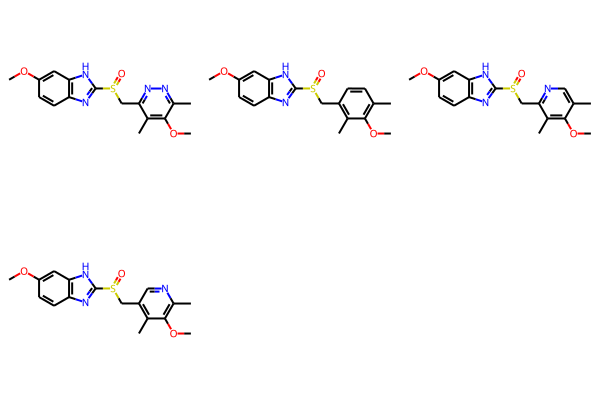

In [16]:
# 今度は56縮環部分は保護してみます。
ringinfo = omeprazole.GetRingInfo()
ringinfo.AtomRings()
# ((1, 6, 5, 4, 3, 2), (14, 13, 17, 16, 15), (18, 19, 20, 21, 15, 16))
protected_omeprazole = copy.deepcopy(omeprazole)
for idx in ringinfo.AtomRings()[1]:
    atom = protected_omeprazole.GetAtomWithIdx(idx)
    atom.SetProp("_protected", "1")
for idx in ringinfo.AtomRings()[2]:
    atom = protected_omeprazole.GetAtomWithIdx(idx)
    atom.SetProp("_protected", "1")
enumerated_mols2 = EnumerateHeterocycles.EnumerateHeterocycles(protected_omeprazole)
enumerated_mols2 = [m for m in enumerated_mols2]
print(len(enumerated_mols2))
# 4
Draw.MolsToGridImage(enumerated_mols2)

### ヘテロシャッフリングについてもう少し詳しく
<a href="https://pubs.acs.org/doi/10.1021/jm3001289" target="_blank">J. Med. Chem. 2012, 55, 11, 5151-5164 </a>では PIM-1 キナーゼ阻害剤における N シャッフリングの効果を Fragment Molecular Orbital 法という量子化学的なアプローチを使って検証しています。<a href="https://pubs.acs.org/doi/10.1021/acs.jcim.8b00563" target="_blank"> J. Chem. Inf. Model. 2019, 59, 1, 149-158 </a>では Asp–Arg 塩橋とヘテロ環のスタッキングのメカニズムを量子化学計算により探っており、置換デザインの指標になりそうです。

バイオアベイラビリティ改善のためにヘテロシャッフリングを行った例としては<a href="https://pubs.acs.org/doi/10.1021/jm101027s" target="_blank"> J. Med. Chem. 2011, 54, 8, 3076-3080 </a>があります。